In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [3]:
NUM_CLASSES = 10

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/3 [=========>....................] - ETA: 1s - loss: 2.3943 - accuracy: 0.0781
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 1s 108ms/step - loss: 2.4139 - accuracy: 0.0690 - val_loss: 2.2888 - val_accuracy: 0.0825
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3721 - accuracy: 0.1094
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 2.3504 - accuracy: 0.1034 - val_loss: 2.2779 - val_accuracy: 0.0722
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3785 - accuracy: 0.0859
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 2.3647 - accuracy: 0.1034 - val_loss: 2.2706 - val_accuracy: 0.0619
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3332 - accuracy: 0.1016
Epoch 4: sa

C:\Users\91790\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 22ms/step - loss: 2.2921 - accuracy: 0.0828 - val_loss: 2.2538 - val_accuracy: 0.0515
Epoch 6/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3128 - accuracy: 0.0703
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 2.2959 - accuracy: 0.1000 - val_loss: 2.2460 - val_accuracy: 0.0412
Epoch 7/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2809 - accuracy: 0.1172
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 20ms/step - loss: 2.2669 - accuracy: 0.1310 - val_loss: 2.2399 - val_accuracy: 0.1237
Epoch 8/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2989 - accuracy: 0.1094
Epoch 8: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 2.2731 - accuracy: 0.1103 - val_loss: 2.2332 -

Epoch 33/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1393 - accuracy: 0.1719
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 2.0912 - accuracy: 0.2000 - val_loss: 2.0526 - val_accuracy: 0.2784
Epoch 34/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0961 - accuracy: 0.1641
Epoch 34: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 2.0738 - accuracy: 0.2103 - val_loss: 2.0437 - val_accuracy: 0.2784
Epoch 35/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0824 - accuracy: 0.2500
Epoch 35: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 2.0947 - accuracy: 0.2448 - val_loss: 2.0359 - val_accuracy: 0.2784
Epoch 36/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0220 - accuracy: 0.2500
Epoch

1/3 [=========>....................] - ETA: 0s - loss: 1.8558 - accuracy: 0.2969
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 1.8645 - accuracy: 0.3103 - val_loss: 1.8289 - val_accuracy: 0.3505
Epoch 61/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9847 - accuracy: 0.2812
Epoch 61: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.9351 - accuracy: 0.3000 - val_loss: 1.8216 - val_accuracy: 0.3505
Epoch 62/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9469 - accuracy: 0.3203
Epoch 62: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.8900 - accuracy: 0.3034 - val_loss: 1.8141 - val_accuracy: 0.3608
Epoch 63/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7924 - accuracy: 0.3359
Epoch 63: saving mo

3/3 [==============================] - 0s 23ms/step - loss: 1.6906 - accuracy: 0.3828 - val_loss: 1.6340 - val_accuracy: 0.4021
Epoch 88/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7581 - accuracy: 0.3594
Epoch 88: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 1.6877 - accuracy: 0.4000 - val_loss: 1.6283 - val_accuracy: 0.4124
Epoch 89/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6958 - accuracy: 0.3906
Epoch 89: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.6949 - accuracy: 0.4069 - val_loss: 1.6222 - val_accuracy: 0.4124
Epoch 90/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6474 - accuracy: 0.4453
Epoch 90: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.6765 - accuracy: 0.4103 - val_loss: 1.

Epoch 115/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4907 - accuracy: 0.4688
Epoch 115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.5453 - accuracy: 0.4276 - val_loss: 1.4502 - val_accuracy: 0.4433
Epoch 116/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5584 - accuracy: 0.4375
Epoch 116: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.5599 - accuracy: 0.4276 - val_loss: 1.4444 - val_accuracy: 0.4433
Epoch 117/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6374 - accuracy: 0.3828
Epoch 117: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 1.5754 - accuracy: 0.4034 - val_loss: 1.4394 - val_accuracy: 0.4536
Epoch 118/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5202 - accuracy: 0.414

1/3 [=========>....................] - ETA: 0s - loss: 1.4971 - accuracy: 0.4219
Epoch 142: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 1.4629 - accuracy: 0.4621 - val_loss: 1.2926 - val_accuracy: 0.5464
Epoch 143/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3758 - accuracy: 0.5078
Epoch 143: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 20ms/step - loss: 1.4516 - accuracy: 0.4414 - val_loss: 1.2875 - val_accuracy: 0.5464
Epoch 144/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5196 - accuracy: 0.4219
Epoch 144: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.4161 - accuracy: 0.4517 - val_loss: 1.2821 - val_accuracy: 0.5464
Epoch 145/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4139 - accuracy: 0.4297
Epoch 145: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.2866 - accuracy: 0.5234
Epoch 169: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.2965 - accuracy: 0.5483 - val_loss: 1.1335 - val_accuracy: 0.5876
Epoch 170/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2230 - accuracy: 0.6094
Epoch 170: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.2767 - accuracy: 0.5586 - val_loss: 1.1277 - val_accuracy: 0.5876
Epoch 171/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3075 - accuracy: 0.5703
Epoch 171: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 1.3089 - accuracy: 0.5448 - val_loss: 1.1216 - val_accuracy: 0.5979
Epoch 172/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2664 - accuracy: 0.5312
Epoch 172: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.0713 - accuracy: 0.6719
Epoch 196: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 23ms/step - loss: 1.1851 - accuracy: 0.6069 - val_loss: 0.9965 - val_accuracy: 0.7216
Epoch 197/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2125 - accuracy: 0.5938
Epoch 197: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 24ms/step - loss: 1.1739 - accuracy: 0.5828 - val_loss: 0.9904 - val_accuracy: 0.7320
Epoch 198/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1485 - accuracy: 0.6016
Epoch 198: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.1247 - accuracy: 0.5931 - val_loss: 0.9829 - val_accuracy: 0.7526
Epoch 199/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1923 - accuracy: 0.5859
Epoch 199: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.2323 - accuracy: 0.5391
Epoch 223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 23ms/step - loss: 1.1305 - accuracy: 0.6034 - val_loss: 0.8659 - val_accuracy: 0.7835
Epoch 224/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1981 - accuracy: 0.5391
Epoch 224: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 23ms/step - loss: 1.0890 - accuracy: 0.5966 - val_loss: 0.8625 - val_accuracy: 0.7938
Epoch 225/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0854 - accuracy: 0.5781
Epoch 225: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 1.0842 - accuracy: 0.5862 - val_loss: 0.8589 - val_accuracy: 0.7938
Epoch 226/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2498 - accuracy: 0.5859
Epoch 226: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.0186 - accuracy: 0.6562
Epoch 250: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.0436 - accuracy: 0.6276 - val_loss: 0.7821 - val_accuracy: 0.7938
Epoch 251/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0556 - accuracy: 0.6328
Epoch 251: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.0099 - accuracy: 0.6414 - val_loss: 0.7806 - val_accuracy: 0.7938
Epoch 252/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1264 - accuracy: 0.5703
Epoch 252: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.0653 - accuracy: 0.6034 - val_loss: 0.7797 - val_accuracy: 0.7938
Epoch 253/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2071 - accuracy: 0.5625
Epoch 253: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.9890 - accuracy: 0.6719
Epoch 277: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.9890 - accuracy: 0.6379 - val_loss: 0.7225 - val_accuracy: 0.8041
Epoch 278/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9849 - accuracy: 0.6172
Epoch 278: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.0030 - accuracy: 0.6379 - val_loss: 0.7200 - val_accuracy: 0.7938
Epoch 279/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9856 - accuracy: 0.6562
Epoch 279: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.9662 - accuracy: 0.6517 - val_loss: 0.7171 - val_accuracy: 0.7938
Epoch 280/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9595 - accuracy: 0.6406
Epoch 280: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.0741 - accuracy: 0.5703
Epoch 304: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 1.0509 - accuracy: 0.5966 - val_loss: 0.6611 - val_accuracy: 0.8041
Epoch 305/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8314 - accuracy: 0.7266
Epoch 305: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.9283 - accuracy: 0.6690 - val_loss: 0.6583 - val_accuracy: 0.8041
Epoch 306/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8564 - accuracy: 0.7188
Epoch 306: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.9452 - accuracy: 0.6690 - val_loss: 0.6574 - val_accuracy: 0.8041
Epoch 307/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9564 - accuracy: 0.6250
Epoch 307: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8335 - accuracy: 0.6953
Epoch 331: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.8454 - accuracy: 0.6897 - val_loss: 0.6127 - val_accuracy: 0.8144
Epoch 332/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8541 - accuracy: 0.7109
Epoch 332: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.8561 - accuracy: 0.6931 - val_loss: 0.6100 - val_accuracy: 0.8144
Epoch 333/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9591 - accuracy: 0.6406
Epoch 333: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.9332 - accuracy: 0.6759 - val_loss: 0.6066 - val_accuracy: 0.8144
Epoch 334/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9213 - accuracy: 0.7188
Epoch 334: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.9669 - accuracy: 0.6562
Epoch 358: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 23ms/step - loss: 0.9317 - accuracy: 0.6759 - val_loss: 0.5781 - val_accuracy: 0.8351
Epoch 359/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9403 - accuracy: 0.6797
Epoch 359: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.9054 - accuracy: 0.6621 - val_loss: 0.5774 - val_accuracy: 0.8660
Epoch 360/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8042 - accuracy: 0.6875
Epoch 360: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.8404 - accuracy: 0.6862 - val_loss: 0.5760 - val_accuracy: 0.8660
Epoch 361/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9759 - accuracy: 0.6797
Epoch 361: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.9021 - accuracy: 0.7344
Epoch 385: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 24ms/step - loss: 0.8555 - accuracy: 0.7138 - val_loss: 0.5559 - val_accuracy: 0.8866
Epoch 386/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8606 - accuracy: 0.6797
Epoch 386: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 31ms/step - loss: 0.8316 - accuracy: 0.6862 - val_loss: 0.5532 - val_accuracy: 0.8866
Epoch 387/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8234 - accuracy: 0.6719
Epoch 387: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.8361 - accuracy: 0.7103 - val_loss: 0.5489 - val_accuracy: 0.8866
Epoch 388/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9652 - accuracy: 0.6484
Epoch 388: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.9384 - accuracy: 0.6484
Epoch 412: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 23ms/step - loss: 0.8913 - accuracy: 0.6655 - val_loss: 0.5043 - val_accuracy: 0.9072
Epoch 413/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8694 - accuracy: 0.7266
Epoch 413: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.8443 - accuracy: 0.6931 - val_loss: 0.5030 - val_accuracy: 0.9072
Epoch 414/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7509 - accuracy: 0.6875
Epoch 414: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 20ms/step - loss: 0.7780 - accuracy: 0.7138 - val_loss: 0.5016 - val_accuracy: 0.9072
Epoch 415/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7771 - accuracy: 0.7188
Epoch 415: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8334 - accuracy: 0.7031
Epoch 439: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.8040 - accuracy: 0.7172 - val_loss: 0.4772 - val_accuracy: 0.8866
Epoch 440/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8113 - accuracy: 0.7031
Epoch 440: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.8203 - accuracy: 0.7000 - val_loss: 0.4764 - val_accuracy: 0.8866
Epoch 441/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9534 - accuracy: 0.6719
Epoch 441: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.8477 - accuracy: 0.6966 - val_loss: 0.4766 - val_accuracy: 0.8969
Epoch 442/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7315 - accuracy: 0.7109
Epoch 442: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8711 - accuracy: 0.6875
Epoch 466: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7885 - accuracy: 0.7034 - val_loss: 0.4561 - val_accuracy: 0.8969
Epoch 467/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7430 - accuracy: 0.7656
Epoch 467: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7333 - accuracy: 0.7448 - val_loss: 0.4539 - val_accuracy: 0.8969
Epoch 468/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7346 - accuracy: 0.7656
Epoch 468: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 20ms/step - loss: 0.7309 - accuracy: 0.7276 - val_loss: 0.4522 - val_accuracy: 0.9072
Epoch 469/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8140 - accuracy: 0.6953
Epoch 469: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7269 - accuracy: 0.7031
Epoch 493: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.8052 - accuracy: 0.7000 - val_loss: 0.4366 - val_accuracy: 0.8969
Epoch 494/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7969 - accuracy: 0.7109
Epoch 494: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.8069 - accuracy: 0.7034 - val_loss: 0.4362 - val_accuracy: 0.8969
Epoch 495/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8668 - accuracy: 0.7031
Epoch 495: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.8081 - accuracy: 0.7138 - val_loss: 0.4362 - val_accuracy: 0.9175
Epoch 496/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8018 - accuracy: 0.7266
Epoch 496: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7287 - accuracy: 0.7578
Epoch 520: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.7679 - accuracy: 0.7241 - val_loss: 0.4187 - val_accuracy: 0.9175
Epoch 521/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8827 - accuracy: 0.6328
Epoch 521: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.8305 - accuracy: 0.6862 - val_loss: 0.4197 - val_accuracy: 0.9072
Epoch 522/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7262 - accuracy: 0.7344
Epoch 522: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.8057 - accuracy: 0.7103 - val_loss: 0.4210 - val_accuracy: 0.9175
Epoch 523/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8156 - accuracy: 0.7031
Epoch 523: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7549 - accuracy: 0.7578
Epoch 547: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.7249 - accuracy: 0.7552 - val_loss: 0.3973 - val_accuracy: 0.8969
Epoch 548/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6954 - accuracy: 0.7344
Epoch 548: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.7696 - accuracy: 0.7034 - val_loss: 0.3945 - val_accuracy: 0.8969
Epoch 549/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7368 - accuracy: 0.7578
Epoch 549: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7214 - accuracy: 0.7310 - val_loss: 0.3918 - val_accuracy: 0.9072
Epoch 550/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6893 - accuracy: 0.7500
Epoch 550: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7080 - accuracy: 0.7734
Epoch 574: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7757 - accuracy: 0.7172 - val_loss: 0.3757 - val_accuracy: 0.9175
Epoch 575/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7564 - accuracy: 0.7422
Epoch 575: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7801 - accuracy: 0.7414 - val_loss: 0.3755 - val_accuracy: 0.9278
Epoch 576/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7744 - accuracy: 0.7656
Epoch 576: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6516 - accuracy: 0.7862 - val_loss: 0.3746 - val_accuracy: 0.9278
Epoch 577/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6828 - accuracy: 0.7734
Epoch 577: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7120 - accuracy: 0.7656
Epoch 601: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7073 - accuracy: 0.7483 - val_loss: 0.3646 - val_accuracy: 0.8969
Epoch 602/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6505 - accuracy: 0.7656
Epoch 602: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6811 - accuracy: 0.7621 - val_loss: 0.3633 - val_accuracy: 0.9072
Epoch 603/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8053 - accuracy: 0.6719
Epoch 603: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.8092 - accuracy: 0.6897 - val_loss: 0.3636 - val_accuracy: 0.9278
Epoch 604/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7359 - accuracy: 0.7422
Epoch 604: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7287 - accuracy: 0.7422
Epoch 628: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.7220 - accuracy: 0.7379 - val_loss: 0.3443 - val_accuracy: 0.9278
Epoch 629/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7057 - accuracy: 0.7578
Epoch 629: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 20ms/step - loss: 0.6993 - accuracy: 0.7379 - val_loss: 0.3431 - val_accuracy: 0.9278
Epoch 630/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6471 - accuracy: 0.8125
Epoch 630: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7054 - accuracy: 0.7448 - val_loss: 0.3415 - val_accuracy: 0.9278
Epoch 631/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6649 - accuracy: 0.7656
Epoch 631: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7240 - accuracy: 0.7891
Epoch 655: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7309 - accuracy: 0.7276 - val_loss: 0.3352 - val_accuracy: 0.9278
Epoch 656/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6896 - accuracy: 0.7344
Epoch 656: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6966 - accuracy: 0.7310 - val_loss: 0.3351 - val_accuracy: 0.9175
Epoch 657/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7291 - accuracy: 0.7266
Epoch 657: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7272 - accuracy: 0.7345 - val_loss: 0.3355 - val_accuracy: 0.9175
Epoch 658/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6940 - accuracy: 0.7500
Epoch 658: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7221 - accuracy: 0.7266
Epoch 682: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 20ms/step - loss: 0.6888 - accuracy: 0.7690 - val_loss: 0.3267 - val_accuracy: 0.9381
Epoch 683/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6722 - accuracy: 0.7422
Epoch 683: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 20ms/step - loss: 0.6395 - accuracy: 0.7862 - val_loss: 0.3259 - val_accuracy: 0.9381
Epoch 684/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7429 - accuracy: 0.7344
Epoch 684: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7213 - accuracy: 0.7483 - val_loss: 0.3253 - val_accuracy: 0.9381
Epoch 685/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7970 - accuracy: 0.6719
Epoch 685: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6939 - accuracy: 0.7266
Epoch 709: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6982 - accuracy: 0.7241 - val_loss: 0.3110 - val_accuracy: 0.9381
Epoch 710/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6084 - accuracy: 0.7969
Epoch 710: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6448 - accuracy: 0.7759 - val_loss: 0.3094 - val_accuracy: 0.9381
Epoch 711/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7586 - accuracy: 0.7500
Epoch 711: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7014 - accuracy: 0.7621 - val_loss: 0.3086 - val_accuracy: 0.9381
Epoch 712/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8513 - accuracy: 0.7031
Epoch 712: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6172 - accuracy: 0.7969
Epoch 736: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.5538 - accuracy: 0.8207 - val_loss: 0.2948 - val_accuracy: 0.9381
Epoch 737/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6864 - accuracy: 0.7500
Epoch 737: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.7286 - accuracy: 0.7379 - val_loss: 0.2941 - val_accuracy: 0.9381
Epoch 738/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8137 - accuracy: 0.7422
Epoch 738: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 23ms/step - loss: 0.7132 - accuracy: 0.7586 - val_loss: 0.2937 - val_accuracy: 0.9381
Epoch 739/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5264 - accuracy: 0.8203
Epoch 739: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6459 - accuracy: 0.7734
Epoch 763: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 25ms/step - loss: 0.6095 - accuracy: 0.7931 - val_loss: 0.2896 - val_accuracy: 0.9588
Epoch 764/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6486 - accuracy: 0.7812
Epoch 764: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.6548 - accuracy: 0.7759 - val_loss: 0.2885 - val_accuracy: 0.9588
Epoch 765/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6414 - accuracy: 0.7656
Epoch 765: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6113 - accuracy: 0.7931 - val_loss: 0.2875 - val_accuracy: 0.9588
Epoch 766/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5587 - accuracy: 0.7812
Epoch 766: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6273 - accuracy: 0.8203
Epoch 790: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.6662 - accuracy: 0.7897 - val_loss: 0.2760 - val_accuracy: 0.9691
Epoch 791/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7125 - accuracy: 0.7266
Epoch 791: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.6995 - accuracy: 0.7517 - val_loss: 0.2773 - val_accuracy: 0.9691
Epoch 792/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6754 - accuracy: 0.8203
Epoch 792: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6435 - accuracy: 0.8207 - val_loss: 0.2794 - val_accuracy: 0.9588
Epoch 793/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6278 - accuracy: 0.7812
Epoch 793: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6219 - accuracy: 0.7734
Epoch 817: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.5759 - accuracy: 0.7862 - val_loss: 0.2762 - val_accuracy: 0.9588
Epoch 818/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6687 - accuracy: 0.7656
Epoch 818: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6827 - accuracy: 0.7379 - val_loss: 0.2745 - val_accuracy: 0.9691
Epoch 819/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6653 - accuracy: 0.7422
Epoch 819: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6467 - accuracy: 0.7724 - val_loss: 0.2742 - val_accuracy: 0.9691
Epoch 820/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5384 - accuracy: 0.8047
Epoch 820: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7708 - accuracy: 0.6641
Epoch 844: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6741 - accuracy: 0.7276 - val_loss: 0.2619 - val_accuracy: 0.9588
Epoch 845/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6029 - accuracy: 0.7656
Epoch 845: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 23ms/step - loss: 0.6038 - accuracy: 0.7897 - val_loss: 0.2613 - val_accuracy: 0.9588
Epoch 846/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6535 - accuracy: 0.7266
Epoch 846: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6061 - accuracy: 0.7793 - val_loss: 0.2605 - val_accuracy: 0.9588
Epoch 847/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5260 - accuracy: 0.8047
Epoch 847: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.5814 - accuracy: 0.7891
Epoch 871: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6713 - accuracy: 0.7483 - val_loss: 0.2606 - val_accuracy: 0.9897
Epoch 872/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5553 - accuracy: 0.7891
Epoch 872: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 21ms/step - loss: 0.6034 - accuracy: 0.7897 - val_loss: 0.2599 - val_accuracy: 0.9897
Epoch 873/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6879 - accuracy: 0.7578
Epoch 873: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 22ms/step - loss: 0.6692 - accuracy: 0.7586 - val_loss: 0.2598 - val_accuracy: 0.9897
Epoch 874/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6476 - accuracy: 0.7734
Epoch 874: sa

In [12]:

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 17ms/step - loss: 0.2552 - accuracy: 0.9794


In [13]:

model = tf.keras.models.load_model(model_save_path)

In [14]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 71ms/step
[2.4646892e-01 9.4757080e-03 2.9248584e-02 8.7080152e-06 9.2360892e-07
 4.7643442e-04 5.2276831e-03 9.7773934e-04 7.0811510e-01 1.5650005e-07]
8


4/4 [==============================] - 0s 1ms/step


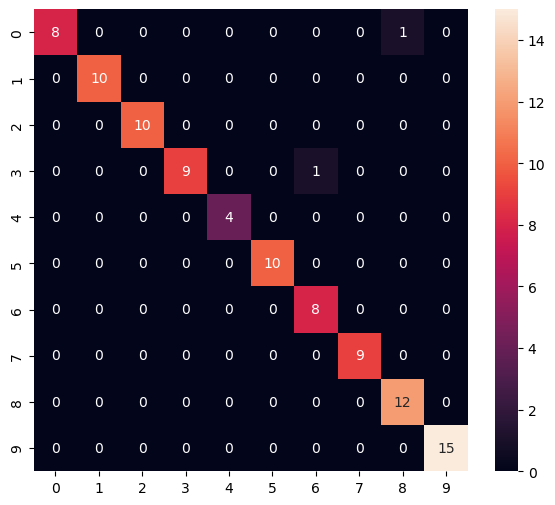

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        10
           6       0.89      1.00      0.94         8
           7       1.00      1.00      1.00         9
           8       0.92      1.00      0.96        12
           9       1.00      1.00      1.00        15

    accuracy                           0.98        97
   macro avg       0.98      0.98      0.98        97
weighted avg       0.98      0.98      0.98        97



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:

model.save(model_save_path, include_optimizer=False)

C:\Users\91790\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:

tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\91790\AppData\Local\Temp\tmpzbc8omt2\assets


INFO:tensorflow:Assets written to: C:\Users\91790\AppData\Local\Temp\tmpzbc8omt2\assets


6808

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.4646908e-01 9.4757043e-03 2.9248554e-02 8.7079798e-06 9.2360779e-07
 4.7643366e-04 5.2276794e-03 9.7773853e-04 7.0811492e-01 1.5649987e-07]
8
